In [1]:
# importy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

## Zadanie 1

Proszę stworzyć zestaw punktów należących do dwóch klas: **K1** i **K2**.  Punkty z klasy **K1** powinny być losowane z rozkładu normalnego o średniej **[0, -1]** i wariancji **1**. Punkty z klasy **K2** powinny pochodzić z rozkładu normalnego o średniej **[1, 1]** i wariancji **1**. Całościowo zbiór powinien zawierać **200 punktów**, po 100 dla każdej klasy.   
Należy wybrać **zbiory uczące** o następującej liczebności: **5, 10, 20 oraz 100**.  Dla każdego wariantu podziału znalezy znaleźć równanie **prostej**, która najlepiej oddziela klasy **K1** i **K2**. Uzyskaną prostą należy
zaprezentować razem z punktami testowymi i linią (hiperpłaszczyzną), która oddziela klasy. Następnie należy ocenić to jak dobrze klasyfikator działa od proporcji danych uczących i testujących.

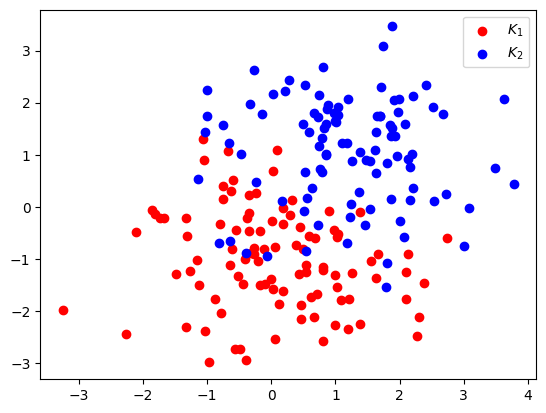

In [25]:
# zestawy punktów dla klas K1 i K2

n_points = 100 # per klasa

# parametry
mean_K1 = [0, -1]
mean_K2 = [1, 1]
cov = 1

# punkty
K1 = np.random.normal(mean_K1, cov, (n_points, 2)) # red
K2 = np.random.normal(mean_K2, cov, (n_points, 2)) # blue

plt.scatter(K1[:, 0], K1[:, 1], c='r', label='$K_1$')
plt.scatter(K2[:, 0], K2[:, 1], c='b', label='$K_2$')
plt.legend()
plt.show()

In [26]:
# dane (K1 + K2) i etykiety

X = np.concatenate((K1, K2))
y = np.array([0]*100 + [1]*100)
# pierwsze 100 -> K1 (0), drugie 100 -> K2 (1)

Size: 5, score: 0.7487


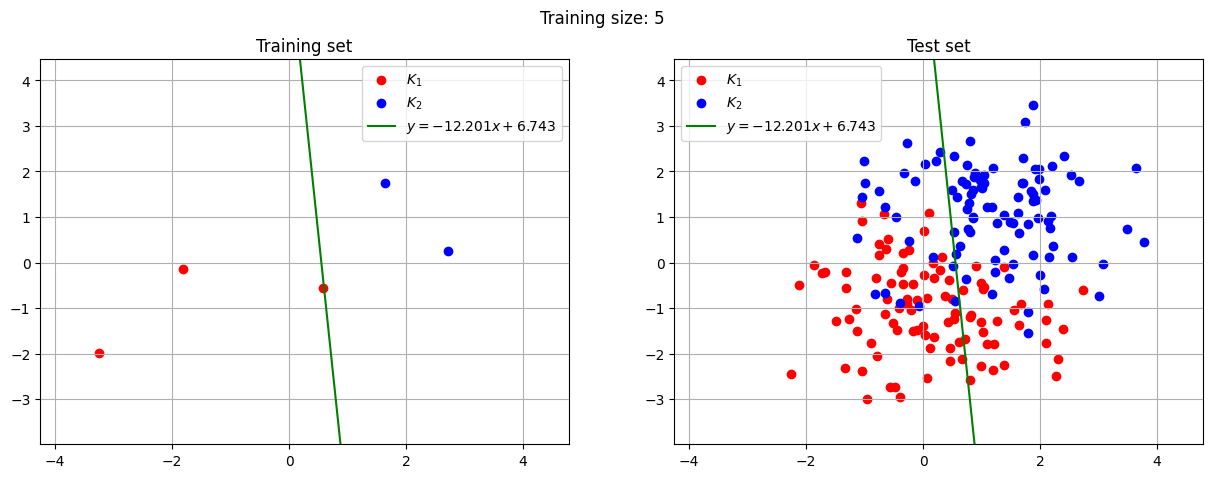

Size: 10, score: 0.8632


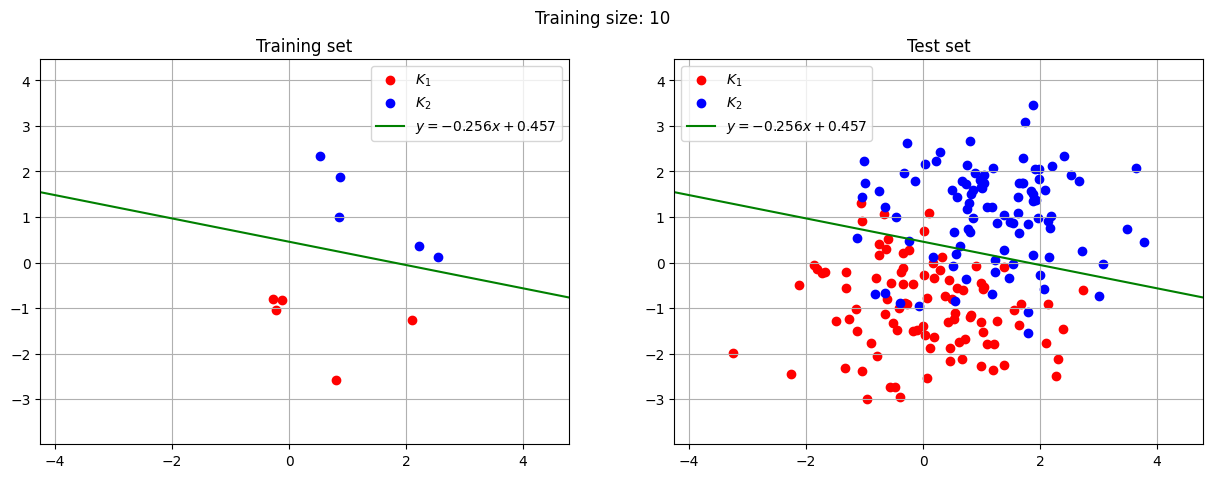

Size: 20, score: 0.8833


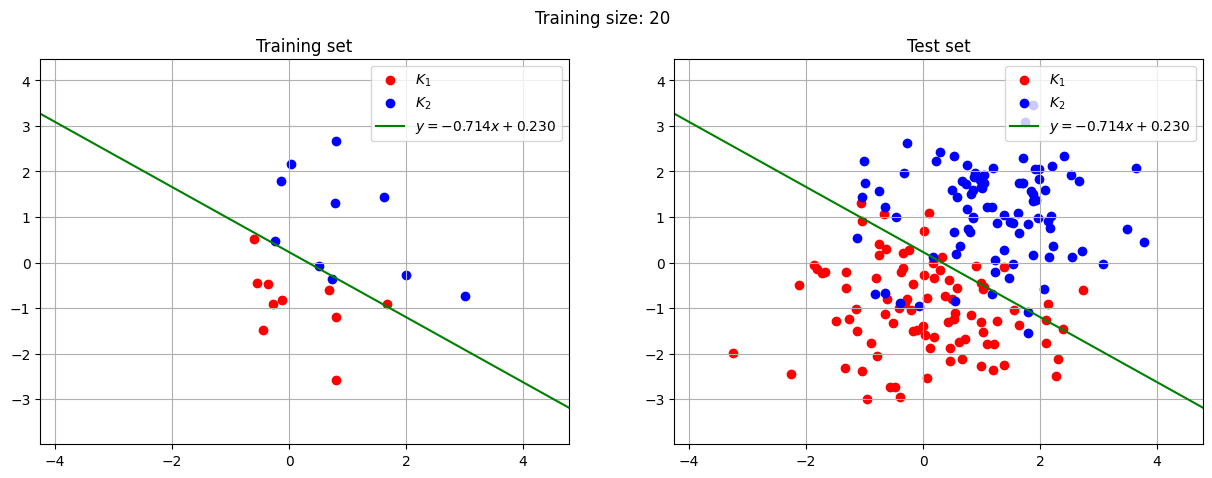

Size: 100, score: 0.9000


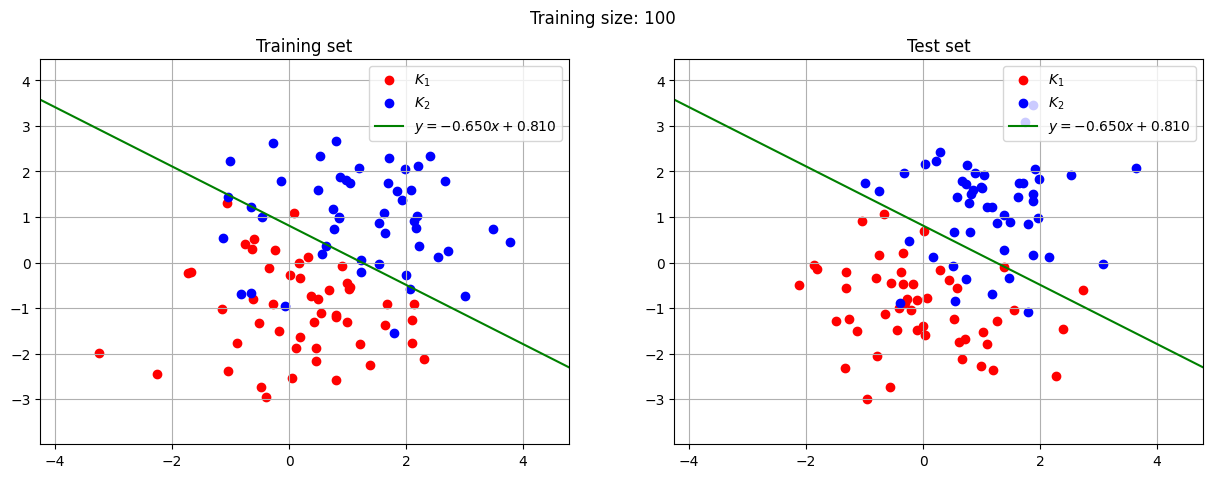

In [36]:
# trenowanie

# przedziały osi na wykresach
x_min = X[:, 0].min() - 1
x_max = X[:, 0].max() + 1
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

train_sizes = [5, 10, 20, 100]

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, stratify=y)

    neuron = Perceptron(tol = 1e-3, max_iter = 20)

    # uczymy
    neuron.fit(X_train, y_train)

    # testujemy
    print(f'Size: {train_size}, score: {neuron.score(X_test, y_test):.4f}')

    # współczynniki
    w1, w2 = neuron.coef_[0]
    b = neuron.intercept_[0]

    a = -w1 / w2
    b = -b / w2

    x_vals = np.linspace(x_min, x_max, 200)
    y_vals = a * x_vals + b

    # rysujemy
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Training size: {train_size}')

    # training set
    ax1.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='r', label='$K_1$')
    ax1.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='b', label='$K_2$')
    ax1.plot(x_vals, y_vals, 'g-', label=f'$y = {a:.3f}x + {b:.3f}$')
    ax1.legend()
    ax1.set_title('Training set')
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y_min, y_max)
    ax1.grid(True)

    # test set
    ax2.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='r', label='$K_1$')
    ax2.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='b', label='$K_2$')
    ax2.plot(x_vals, y_vals, 'g-', label=f'$y = {a:.3f}x + {b:.3f}$')
    ax2.legend()
    ax2.set_title('Test set')
    ax2.set_xlim(x_min, x_max)
    ax2.set_ylim(y_min, y_max)
    ax2.grid(True)

    plt.show()

## Zadanie 2

Analiza próbek benzyny wykazała że może ona być przypisana do **dwóch klas** czystości A i B (dla potrzeb zadania można je oznaczyć 0 i 1). Proszę skorzystać z pliku fuel.txt, w którym pierwsze trzy kolumny to właściwości fizykochemiczne próbek, czwarta kolumna - klasa czystości.

Proszę sprawdzić skuteczność sieci opartej o pojedynczy neuron do klasyfikacji w tym problemie, porównując wyniki dla **pięciokrotnego** uczenia sieci. Proszę potraktować wszystkie dane jako dane uczące.

         c_1    c_2      c_3 purity_class
0    645.795  0.151  155.570            B
1   1334.246  0.022  154.000            B
2   1102.023  0.122  155.495            B
3    316.575  0.070  152.951            B
4   -427.025  0.199  150.674            A
..       ...    ...      ...          ...
95  -115.427  0.268  150.050            A
96  -832.368 -0.043  155.309            A
97  1565.969  0.270  153.176            B
98 -1435.530  0.093  154.408            A
99 -1983.326  0.054  151.766            A

[100 rows x 4 columns]


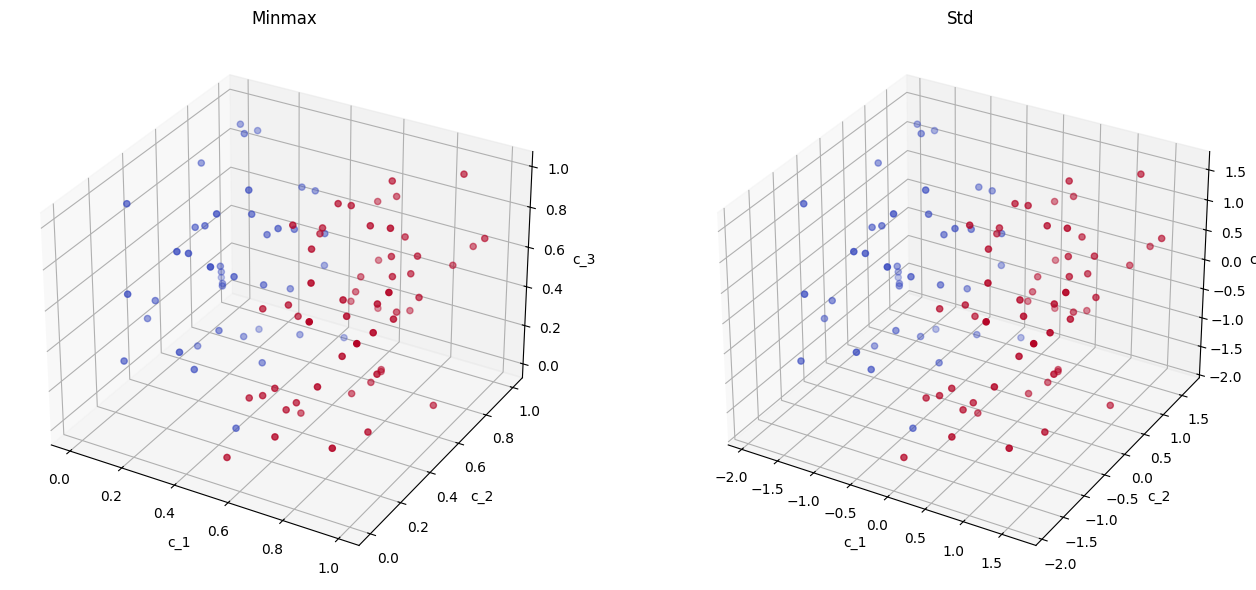

In [39]:
# ładowanie fuel.txt
import os
import pandas as pd

# załaduj dane z fuel.txt jako DataFrame
fuel_data = pd.read_csv(os.path.join('data', 'fuel.txt'))
print(fuel_data)
type(fuel_data)

# zamiana labeli: A -> 0, B -> 1
fuel_data['purity_class'] = fuel_data['purity_class'].map({'A': 0, 'B': 1})

# dane
Xf = fuel_data.drop('purity_class', axis=1).to_numpy()
Yf = fuel_data['purity_class'].to_numpy()

# skalowanie minmax
X_min = Xf.min(axis=0)
X_max = Xf.max(axis=0)
X_minmax_scaled = (Xf - X_min) / (X_max - X_min)

# skalowanie do rozkładu standardowego
X_mean = Xf.mean(axis=0)
X_std = Xf.std(axis=0)
X_std_scaled = (Xf - X_mean) / X_std

# wizualizacja
df_minmax = pd.DataFrame(X_minmax_scaled, columns=['c_1', 'c_2', 'c_3'])
df_minmax['purity_class'] = Yf

df_std = pd.DataFrame(X_std_scaled, columns=['c_1', 'c_2', 'c_3'])
df_std['purity_class'] = Yf

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
minmax_scatter = ax1.scatter(df_minmax['c_1'], df_minmax['c_2'], df_minmax['c_3'], c=df_minmax['purity_class'], cmap='coolwarm')
ax1.set_ylabel('c_2')
ax1.set_xlabel('c_1')
ax1.set_zlabel('c_3')
ax1.set_title('Minmax')

ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(df_std['c_1'], df_std['c_2'], df_std['c_3'], c=df_std['purity_class'], cmap='coolwarm')
ax2.set_xlabel('c_1')
ax2.set_ylabel('c_2')
ax2.set_zlabel('c_3')
ax2.set_title('Std')

plt.tight_layout()
plt.show()

Iteracja: 1, score: 0.9600
Iteracja: 2, score: 0.9600
Iteracja: 3, score: 0.9600
Iteracja: 4, score: 0.9600
Iteracja: 5, score: 0.9600


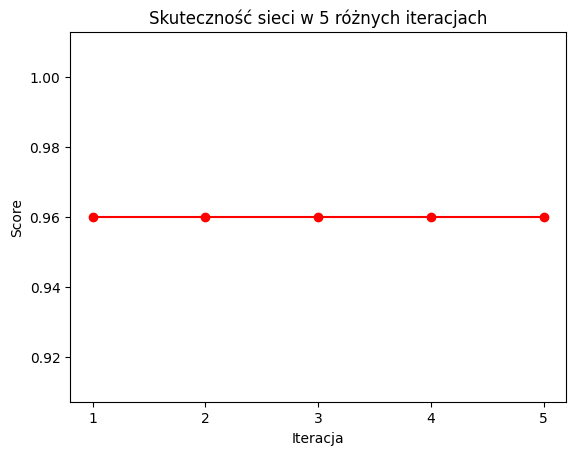

In [40]:
from sklearn.metrics import accuracy_score

# trenowanie
accuracy_scores = []

for i in range(5):
    neuron = Perceptron(tol = 1e-3, max_iter = 20)
    neuron.fit(X_minmax_scaled, Yf)
    Y_pred = neuron.predict(X_minmax_scaled)
    accuracy = accuracy_score(Yf, Y_pred)
    accuracy_scores.append(accuracy)
    print(f'Iteracja: {i+1}, score: {accuracy:.4f}')

# wykres
plt.plot(range(1, 6), accuracy_scores, marker='o', linestyle='-', color='r')
plt.xlabel('Iteracja')
plt.ylabel('Score')
plt.title('Skuteczność sieci w 5 różnych iteracjach')
plt.xticks(range(1, 6))
plt.show()

## Zadanie 3

Proszę pobrać zbiór https://archive.ics.uci.edu/ml/datasets/iris. Można to też zrobić w pythonie używając funkcji sklearn.datasets.load_iris(). Następnie proszę dokonać samodzielnego podziału na dane uczące i testujące w proporcji **80%/20%**. Proszę zbudować sieć złożoną z pojedynczej warstwy perceptronów (np. używając omawianej już tutaj funkcji sklearn.linear_model.Perceptron), której zadaniem będzie jak najdokładniejsza klasyfikacja gatunków irysów na podstawie ich pomiarów. Proszę dokonać analizy macierzy pomyłek dla kilku uruchomień algorytmu. Zachęcam do rozważenia pytania: jaką największą trafność jest w stanie uzyskać w klasyfikacji irysów z podanego zbioru pojedyncza warstwa perceptronów? Dlaczego? (Podpowiedź: polecamy przyjrzeć się pojęciu liniowej separowalności)

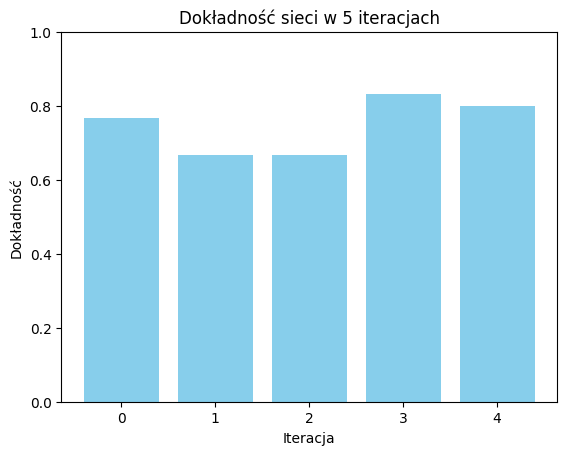

<Figure size 300x300 with 0 Axes>

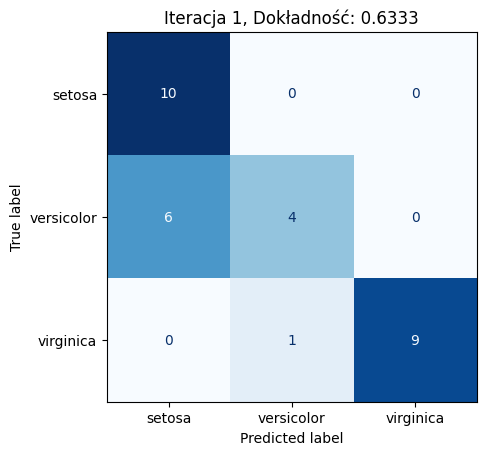

<Figure size 300x300 with 0 Axes>

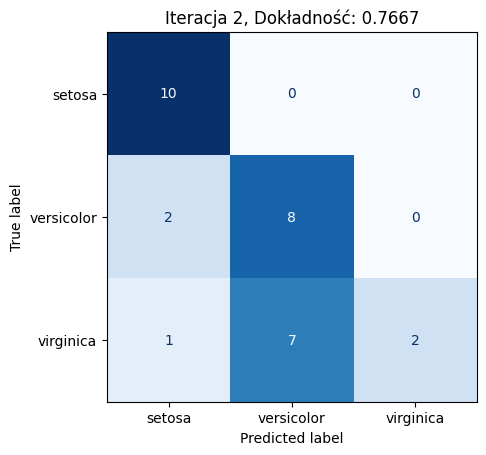

<Figure size 300x300 with 0 Axes>

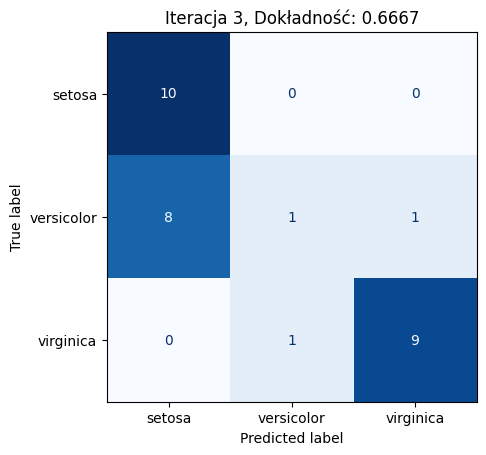

<Figure size 300x300 with 0 Axes>

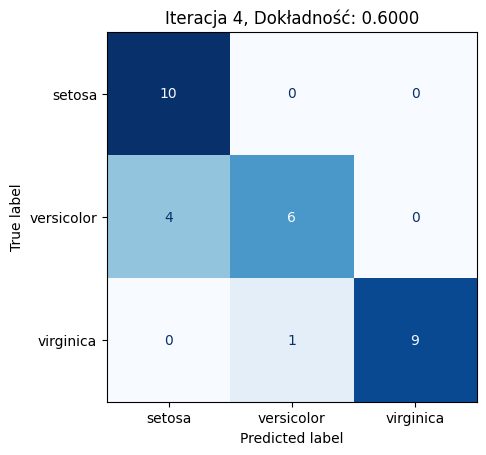

<Figure size 300x300 with 0 Axes>

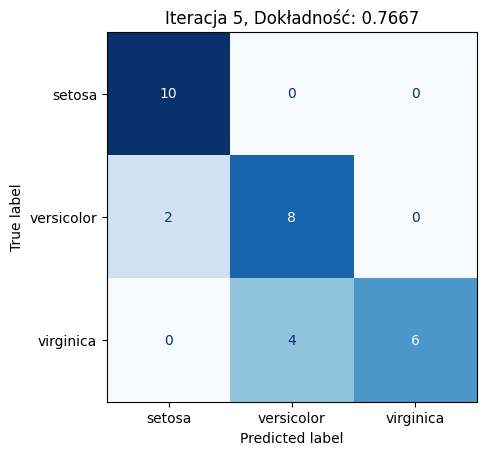

In [84]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning

def train_and_evaluate(train_size, max_iter=50, tol=1e-3):
    # ładowanie datasetu irysów
    iris = load_iris()
    X, y = iris.data, iris.target
    
    # podział dane uczące, testujące
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, stratify=y)
    
    # skalowanie
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # utworzenie sieci 3 perceptronów
    perceptrons = []
    n_iters = []
    for j in range(3):
        y_train_binary = (y_train == j).astype(int) # klasa j vs reszta klas, jeden perceptron -> jedna klasa
        perceptron = Perceptron(tol=tol, max_iter=max_iter, shuffle=True)
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=ConvergenceWarning)
            perceptron.fit(X_train, y_train_binary)
        perceptrons.append(perceptron)
        n_iters.append(perceptron.n_iter_)
    
    # testowanie
    predictions = np.array([p.predict(X_test) for p in perceptrons])  # wyniki dla każdej z klas
    final_predictions = np.argmax(predictions, axis=0)  # jako odpowiedź wybieramy jedną z klas
    
    # dokładność + confusion matrix
    accuracy = accuracy_score(y_test, final_predictions)
    cm = confusion_matrix(y_test, final_predictions)
    
    return accuracy, cm, np.mean(n_iters)

def evaluate(num_iterations=5):
    accuracies = []
    conf_matrices = []

    # zrob n iteracji
    for i in range(num_iterations):
        acc, cm, _ = train_and_evaluate(0.8)
        accuracies.append(acc)
        conf_matrices.append(cm)
    
    # narysuj dokładność w każdej iteracji
    plt.bar(range(num_iterations), accuracies, color='skyblue')
    plt.xlabel('Iteracja')
    plt.ylabel('Dokładność')
    plt.title('Dokładność sieci w 5 iteracjach')
    plt.ylim(0, 1)
    plt.show()

    # narysuj macierze pomyłek
    for i, cm in enumerate(conf_matrices):
        plt.figure(figsize=(3, 3))
        disp = ConfusionMatrixDisplay(cm, display_labels=load_iris().target_names)
        disp.plot(cmap='Blues', colorbar=False)
        plt.title(f'Iteracja {i+1}, Dokładność: {accuracy_scores[i]:.4f}')
        plt.show()

evaluate()

# Zadanie 4

Proszę spróbować podzielić zbiór irysów na zbiór uczący i testujący na co najmniej 3 różne sposoby. Jak duży jest wpływ podziału na wynik?

Podział 10-90: Średnia dokładność = 0.6696
Podział 30-70: Średnia dokładność = 0.6762
Podział 50-50: Średnia dokładność = 0.6560
Podział 90-10: Średnia dokładność = 0.6800


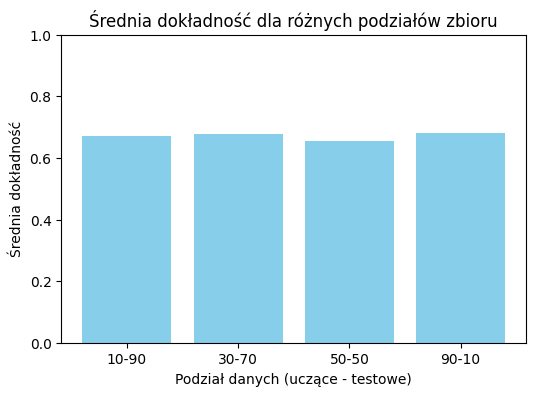

In [86]:
def evaluate_splits(splits, num_iterations=5):
    average_results = {}
    all_conf_matrices = {}
    
    for split_name, train_size in splits.items():
        accuracies = []
        conf_matrices = []
        
        for i in range(num_iterations):
            accuracy, cm, _ = train_and_evaluate(train_size)
            accuracies.append(accuracy)
            conf_matrices.append(cm)
        
        avg_accuracy = np.mean(accuracies)
        average_results[split_name] = avg_accuracy
        all_conf_matrices[split_name] = conf_matrices
        print(f'Podział {split_name}: Średnia dokładność = {avg_accuracy:.4f}')
    
    return average_results, all_conf_matrices

splits = {
    '10-90': 0.1,
    '30-70': 0.3,
    '50-50': 0.5,
    '90-10': 0.9
}

# Wykonanie ewaluacji
average_results, all_conf_matrices = evaluate_splits(splits)

# Wizualizacja wyników
plt.figure(figsize=(6, 4))
plt.bar(average_results.keys(), average_results.values(), color='skyblue')
plt.xlabel('Podział danych (uczące - testowe)')
plt.ylabel('Średnia dokładność')
plt.title('Średnia dokładność dla różnych podziałów zbioru')
plt.ylim(0, 1)
plt.show()

# Zadanie 5

Proszę sprawdzić wpływ ilości epok na poprawność klasyfikacji zbioru irysów z poprzednich zadań, dla wybranych ilości epok (polecamy spróbować od jak najmniejszej, np. od 1 lub 2 epok). Żeby zapobiec wcześniejszemu przerywaniu uczenia, w pakiecie Sklearn można ustalić argument tol na odpowiednio małą liczbę czy ustawiając argument early_stopping na False. Można też zamiast tego (lub dodatkowo) nie wyłączać tych kryteriów i zamiast tego prawdzić wartość ilość faktycznych epok potrzebnych do ich osiągnięcia (n_iter_) Proszę przedstawić wnioski, np. na wykresie zależności średniej trafności klasyfikacji na zbiorze testującym w zależności od liczby epok.

Maksymalna liczba epok = 1: Średnia dokładność = 0.6267, Wariancja = 0.0015, Średnia liczby iteracji = 1.00
Maksymalna liczba epok = 2: Średnia dokładność = 0.6733, Wariancja = 0.0064, Średnia liczby iteracji = 2.00
Maksymalna liczba epok = 5: Średnia dokładność = 0.7133, Wariancja = 0.0020, Średnia liczby iteracji = 5.00
Maksymalna liczba epok = 10: Średnia dokładność = 0.6867, Wariancja = 0.0052, Średnia liczby iteracji = 7.67
Maksymalna liczba epok = 20: Średnia dokładność = 0.6867, Wariancja = 0.0012, Średnia liczby iteracji = 10.07
Maksymalna liczba epok = 50: Średnia dokładność = 0.7467, Wariancja = 0.0132, Średnia liczby iteracji = 9.73
Maksymalna liczba epok = 100: Średnia dokładność = 0.6733, Wariancja = 0.0064, Średnia liczby iteracji = 9.53
Maksymalna liczba epok = 300: Średnia dokładność = 0.6267, Wariancja = 0.0024, Średnia liczby iteracji = 10.00


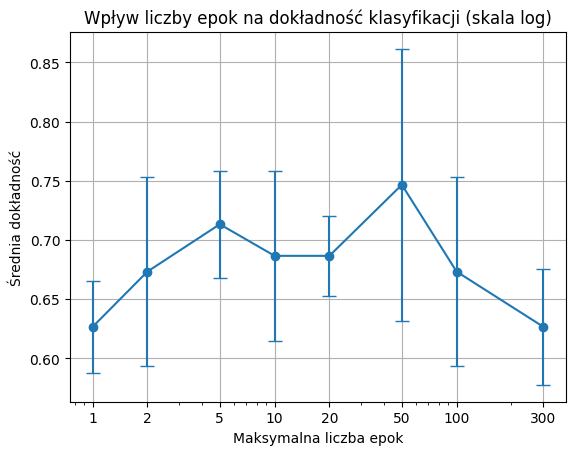

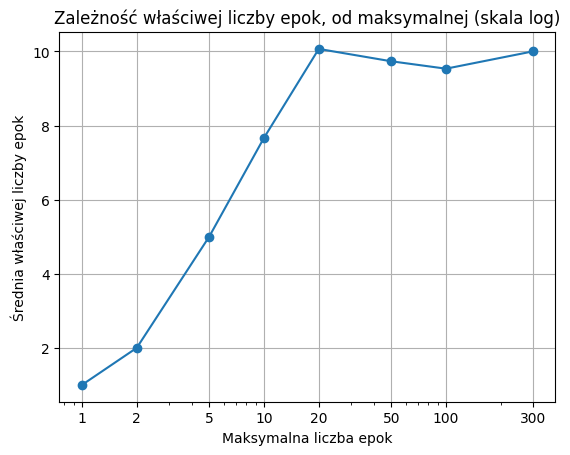

In [96]:
def evaluate_epochs(epoch_values, num_iterations=5):
    mean_accuracies = []
    variances = []
    n_iter_means = []
    
    for max_iter in epoch_values:
        accuracies = []
        n_iters = []
        for i in range(num_iterations):
            accuracy, cm, mean_iters = train_and_evaluate(0.8, max_iter)
            accuracies.append(accuracy)
            n_iters.append(mean_iters)
        
        mean_accuracies.append(np.mean(accuracies))
        variances.append(np.var(accuracies))
        n_iter_means.append(np.mean(n_iters))
        
        print(f'Maksymalna liczba epok = {max_iter}: Średnia dokładność = {np.mean(accuracies):.4f}, Wariancja = {np.var(accuracies):.4f}, Średnia liczby iteracji = {np.mean(n_iters):.2f}')
    
    # dokładność
    plt.errorbar(epoch_values, mean_accuracies, yerr=np.sqrt(variances), fmt='-o', capsize=5)
    plt.xscale('log')
    plt.xticks(epoch_values, epoch_values)
    plt.xlabel("Maksymalna liczba epok")
    plt.ylabel("Średnia dokładność")
    plt.title("Wpływ liczby epok na dokładność klasyfikacji (skala log)")
    plt.grid(True)
    plt.show()
    
    # średnia liczby właściwej liczby iteracji
    plt.plot(epoch_values, n_iter_means, '-o')
    plt.xscale('log')
    plt.xticks(epoch_values, epoch_values)
    plt.xlabel("Maksymalna liczba epok")
    plt.ylabel("Średnia właściwej liczby epok")
    plt.title("Zależność właściwej liczby epok, od maksymalnej (skala log)")
    plt.grid(True)
    plt.show()

epoch_values = [1, 2, 5, 10, 20, 50, 100, 300]
evaluate_epochs(epoch_values)
